In [1]:
%matplotlib inline

In [2]:
from collections import Counter
import traceback
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

from konlpy.tag import Kkma, Mecab, Okt

In [3]:
tagger = Okt() # Kkma()

/Users/heegyukim/.pyenv/versions/3.6.5/envs/denuri/lib/python3.6/site-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [4]:
%%time
with open("output.jsl") as f:
    lines = f.readlines()
    data = pd.DataFrame([json.loads(x) for x in lines])
# data = pd.read_csv("../data/news_reactions_tokenized.csv")
# data = pd.read_json("../data/news_reactions_tokenized.json")

CPU times: user 12.1 s, sys: 1.58 s, total: 13.7 s
Wall time: 15.6 s


In [5]:
data.head()

,aid,sid,oid,title,content,scraped_at,published_at,comment_count,r.aid,good,warm,sad,angry,want
0,0000000091,102,629,"서초동 촛불집회, 오늘(28일) '찬성vs반대' 맞불 : 네이버 뉴스",\n\t\n\n\t\n\n\n\n\n\n\n\t\n\t\n[더팩트ㅣ성강현 기자] 이...,2019-09-28T02:42:15,2019.09.28. 오전 12:01,None,0000000091,46,2,2,241,1
1,0000000304,101,629,"우리·하나은행, 안전자산 예금 선호 고객 노려 DLF 팔았다 : 네이버 뉴스",\n\t\n\n\t\n\n\n\n\n\n\n\t\n\t\n[더팩트｜이지선 기자] 대...,2019-10-01T17:02:10,2019.10.01. 오후 4:49,None,0000000304,0,0,0,2,1
2,0000000318,102,607,[전두환 프로젝트] ④ 연희동 집 가구세트도 막대한 세금으로 구입 : 네이버 뉴스,\n\t\n\n\t\n\n\n\n\n\n\n\t\n\t\n\t\n----------...,2019-09-09T11:22:07,2019.09.09. 오전 11:17,None,0000000318,0,0,0,6,2
3,0000000320,102,607,"식약처, 존슨앤드존슨 제품은 빼고 '암 위험 인공유방 퇴출' : 네이버 뉴스",\n\t\n\n\t\n\n\n\n\n\n\n\t\n\t\n식품의약품안전처가 암 발병...,2019-09-10T14:20:49,2019.09.10. 오후 2:10,None,0000000320,0,0,0,14,0
4,0000000341,102,607,알고도 덮었나?...HDC신라면세점 밀수 은폐 의혹 : 네이버 뉴스,\n\t\n\n\t\n\n\n\n\n\n\n\t\n\t\n관세청이 HDC신라면세점 ...,2019-10-08T17:41:46,2019.10.08. 오후 5:26,None,0000000341,0,2,0,3,1


In [6]:
data['date'] = data['published_at'].map(lambda x: x[:10])
data.content = data.content.map(lambda x: x.strip() if x else "")

In [7]:
data.head()

,aid,sid,oid,title,content,scraped_at,published_at,comment_count,r.aid,good,warm,sad,angry,want,date
0,0000000091,102,629,"서초동 촛불집회, 오늘(28일) '찬성vs반대' 맞불 : 네이버 뉴스",[더팩트ㅣ성강현 기자] 이번 주말 서울 서초동에서 조국 법무부 장관 찬반 촛불집회가...,2019-09-28T02:42:15,2019.09.28. 오전 12:01,None,0000000091,46,2,2,241,1,2019.09.28
1,0000000304,101,629,"우리·하나은행, 안전자산 예금 선호 고객 노려 DLF 팔았다 : 네이버 뉴스",[더팩트｜이지선 기자] 대량 원금 손실을 불러온 해외 주요국 금리 연계형 파생결합상...,2019-10-01T17:02:10,2019.10.01. 오후 4:49,None,0000000304,0,0,0,2,1,2019.10.01
2,0000000318,102,607,[전두환 프로젝트] ④ 연희동 집 가구세트도 막대한 세금으로 구입 : 네이버 뉴스,----------\n1988년 2월 대통령 자리에서 물러난 전두환이 별도의 ‘전직...,2019-09-09T11:22:07,2019.09.09. 오전 11:17,None,0000000318,0,0,0,6,2,2019.09.09
3,0000000320,102,607,"식약처, 존슨앤드존슨 제품은 빼고 '암 위험 인공유방 퇴출' : 네이버 뉴스",식품의약품안전처가 암 발병 사례가 보고된 인공유방 보형물이 리콜되고 한 달이 지나서...,2019-09-10T14:20:49,2019.09.10. 오후 2:10,None,0000000320,0,0,0,14,0,2019.09.10
4,0000000341,102,607,알고도 덮었나?...HDC신라면세점 밀수 은폐 의혹 : 네이버 뉴스,관세청이 HDC신라면세점 전 대표의 시계 밀수 사건을 관세법 위반 혐의로 검찰에 송...,2019-10-08T17:41:46,2019.10.08. 오후 5:26,None,0000000341,0,2,0,3,1,2019.10.08


In [8]:
data.describe()

,good,warm,sad,angry,want
count,80130.000000,80130.000000,80130.000000,80130.000000,80130.000000
mean,108.266342,1.784850,6.232235,257.210770,3.610358
std,694.809318,10.517918,60.918898,1200.595844,10.751255
min,-8.000000,0.000000,-4.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,2.000000,0.000000
50%,5.000000,0.000000,0.000000,13.000000,1.000000
75%,23.000000,2.000000,2.000000,90.000000,3.000000
max,41867.000000,2569.000000,7702.000000,50444.000000,1173.000000


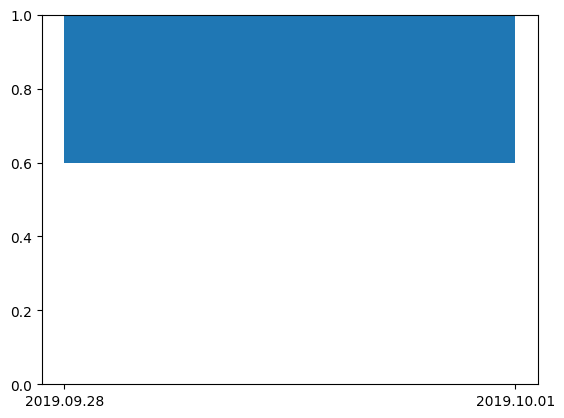

In [9]:
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(np.arange(len(data)), data.date)
ax.invert_yaxis()
plt.show()

## 텍스트 분석
제목 평균길이<br>
내용 평균길이<br>
토큰 길이 분석

In [18]:
pos = data[data.reaction_category == 0]
neg = data[data.reaction_category == 1]
few = data[data.reaction_category == 3]

print(len(pos), len(neg), len(few))

9654 24246 45731


In [9]:
%%time 

allowed_pos = [
    'Noun', 'Verb', 'Adjective', 'Adverb', 'Alpha', 'Determiner', 'Exclamation'
    , 'Suffix', 'PreEomi', 'Unknown'
]
def try_tagging(x):
    x = x.strip() if x else ""
    tokens = tagger.pos(x)
#     tokens = filter(lambda x: x[1] in allowed_pos, tokens)
#     tokens = map(lambda x: x[0], tokens)
    return list(tokens)

# print(tagger.tagset)
# print(" ".join(try_tagging(data.content[1])))
data['title_len'] = data['title'].map(lambda x: len(x))
data['content_len'] = data['content'].map(lambda x: len(x))
data['title_token'] = data.title.map(try_tagging)
data['title_token_len'] = data.title_token.map(lambda x: len(x))
data['content_token'] = data.content.map(try_tagging)
data['content_token_len'] = data.content_token.map(lambda x: len(x))

CPU times: user 1h 12min 57s, sys: 1min 7s, total: 1h 14min 4s
Wall time: 1h 19min 39s


In [10]:
print(data['title_token'].head())
print(data['content_token'].head())

0    [(서초동, Noun), (촛불집회, Noun), (,, Punctuation), ...
1    [(우리, Noun), (·, Punctuation), (하나은행, Noun), (...
2    [([, Punctuation), (전두환, Noun), (프로젝트, Noun), ...
3    [(식약처, Noun), (,, Punctuation), (존슨, Noun), (앤...
4    [(알고도, Verb), (덮었나, Verb), (?..., Punctuation)...
Name: title_token, dtype: object
0    [([, Punctuation), (더, Noun), (팩트, Noun), (ㅣ, ...
1    [([, Punctuation), (더, Noun), (팩트, Noun), (｜, ...
2    [(----------, Punctuation), (\n, Foreign), (19...
3    [(식품의약품안전처, Noun), (가, Josa), (암, Noun), (발병, ...
4    [(관세청, Noun), (이, Josa), (HDC, Alpha), (신라, No...
Name: content_token, dtype: object


Title length
count    58146.000000
mean        41.480996
std          6.285179
min         13.000000
25%         38.000000
50%         41.000000
75%         45.000000
max        107.000000
Name: title_len, dtype: float64


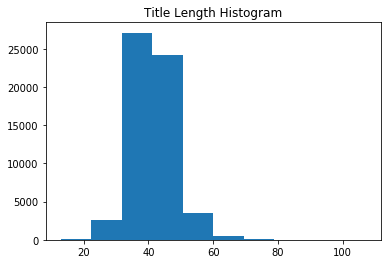

Title token length
count    58146.000000
mean        17.504351
std          3.276470
min          5.000000
25%         15.000000
50%         17.000000
75%         19.000000
max         44.000000
Name: title_token_len, dtype: float64


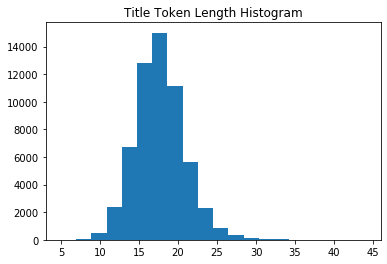

In [32]:
print("Title length")
print(data.title_len.describe())
plt.title("Title Length Histogram")
plt.hist(data['title_len'], bins=10)
plt.show()

print("Title token length")
print(data.title_token_len.describe())
plt.title("Title Token Length Histogram")
plt.hist(data['title_token_len'], bins=20)
plt.show()

Content length
count    58146.000000
mean      1512.707392
std       1009.564840
min          0.000000
25%        980.000000
50%       1324.000000
75%       1798.000000
max      28082.000000
Name: content_len, dtype: float64


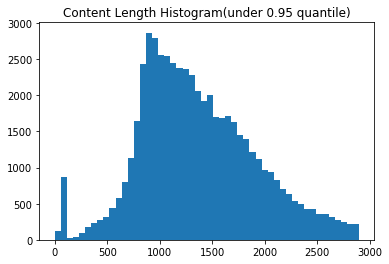

Content token length
count    58146.000000
mean       633.871960
std        422.685847
min          0.000000
25%        408.000000
50%        557.000000
75%        754.000000
max      12011.000000
Name: content_token_len, dtype: float64


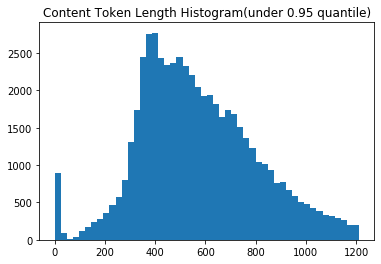

In [33]:
print("Content length")
print(data.content_len.describe())
plt.title("Content Length Histogram(under 0.95 quantile)")
plt.hist(data[data.content_len < data.content_len.quantile(0.95)]['content_len'], bins=50)
plt.show()

print("Content token length")
print(data.content_token_len.describe())
plt.title("Content Token Length Histogram(under 0.95 quantile)")
plt.hist(data[data.content_token_len < data.content_token_len.quantile(0.95)] ['content_token_len'], bins=50)
plt.show()

## 감정 분석
4분위 분석
감정표현 총 합의 평균

In [34]:
reactions = data[['good', 'warm', 'sad', 'angry', 'want']]
total = reactions.sum(axis=1)
pos = data[['good', 'warm']].sum(axis=1)
neg = data.angry

Total Reactions
count    58146.000000
mean       510.857187
std       1676.887763
min          0.000000
25%         13.000000
50%         81.000000
75%        320.000000
max      52982.000000
dtype: float64


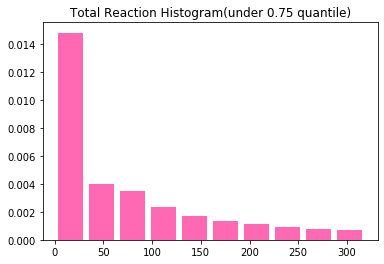

Positive Reactions(Good,Warm)
count    58146.000000
mean       148.272676
std        815.878480
min          0.000000
25%          2.000000
50%          9.000000
75%         44.000000
max      42011.000000
dtype: float64


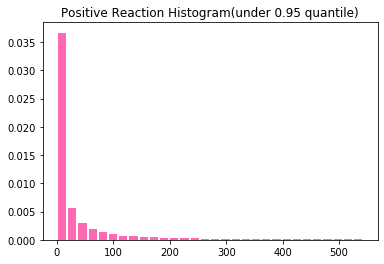

Negative Reactions(Sad, Angry)
count    58146.000000
mean       350.194356
std       1397.676322
min          0.000000
25%          4.000000
50%         33.000000
75%        169.000000
max      50444.000000
Name: angry, dtype: float64


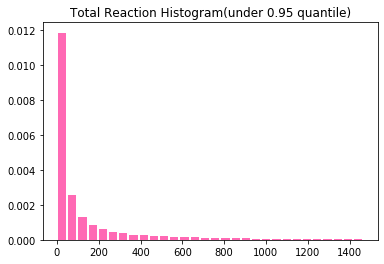

In [35]:
print("Total Reactions")
print(total.describe())
plt.title("Total Reaction Histogram(under 0.75 quantile)")
plt.hist(total[total < total.quantile(0.75)] , 
         bins=10, ## 몇 개의 바구니로 구분할 것인가. 
         density=True, ## ytick을 퍼센트비율로 표현해줌 
         cumulative=False, ## 누적으로 표현하고 싶을 때는 True
         histtype='bar',  ## 타입. or step으로 하면 모양이 바뀜.  
         orientation='vertical', ## or horizontal
         rwidth=0.8, ## 1.0일 경우, 꽉 채움 작아질수록 간격이 생김
         color='hotpink', ## bar 색깔
        )
plt.show()
print("Positive Reactions(Good,Warm)")
print(pos.describe())
plt.title("Positive Reaction Histogram(under 0.95 quantile)")
plt.hist(pos[pos < pos.quantile(0.95)] , 
         bins=30, ## 몇 개의 바구니로 구분할 것인가. 
         density=True, ## ytick을 퍼센트비율로 표현해줌 
         cumulative=False, ## 누적으로 표현하고 싶을 때는 True
         histtype='bar',  ## 타입. or step으로 하면 모양이 바뀜.  
         orientation='vertical', ## or horizontal
         rwidth=0.8, ## 1.0일 경우, 꽉 채움 작아질수록 간격이 생김
         color='hotpink', ## bar 색깔
        )
plt.show()
print("Negative Reactions(Sad, Angry)")
print(neg.describe())
plt.title("Total Reaction Histogram(under 0.95 quantile)")
plt.hist(neg[neg < neg.quantile(0.95)] , 
         bins=30, ## 몇 개의 바구니로 구분할 것인가. 
         density=True, ## ytick을 퍼센트비율로 표현해줌 
         cumulative=False, ## 누적으로 표현하고 싶을 때는 True
         histtype='bar',  ## 타입. or step으로 하면 모양이 바뀜.  
         orientation='vertical', ## or horizontal
         rwidth=0.8, ## 1.0일 경우, 꽉 채움 작아질수록 간격이 생김
         color='hotpink', ## bar 색깔
        )
plt.show()

In [36]:
category_label = ['pos', 'neg', 'unk', 'few']
category = []
pos_neg_rates = []
ok = 0

for i in range(len(data)):
    r = 2
    p = pos[i]
    n = neg[i]
    
    if p + n >= 50 :
        rate = p / (n + p)
        pos_neg_rates.append(rate)
        if abs(rate - 0.5) > 0.05:
            r = 0 if p > n else 1
        else:
            r = 2
        ok = ok + 1
    else:
        r = 3
        
    category.append(r)

print("total count", len(category), ok)

KeyError: 2

In [ ]:
plt.title("Pos, Neg, Natural Histogram")
# plt.hist(list(map(lambda x: category_label[x], category)), weights=np.ones(len(category)) / len(category))
# plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.hist(list(map(lambda x: category_label[x], category)))
plt.show()
plt.title("pos_neg_rates Histogram")
plt.hist(pos_neg_rates, bins=5, weights=np.ones(len(pos_neg_rates)) / len(pos_neg_rates))
plt.show()

In [18]:
data['reaction_category'] = category
data.head()

,aid,sid,oid,title,content,scraped_at,published_at,comment_count,r.aid,good,...,angry,want,date,title_len,content_len,title_token,title_token_len,content_token,content_token_len,reaction_category
0,0000000091,102,629,"서초동 촛불집회, 오늘(28일) '찬성vs반대' 맞불 : 네이버 뉴스",[더팩트ㅣ성강현 기자] 이번 주말 서울 서초동에서 조국 법무부 장관 찬반 촛불집회가...,2019-09-28T02:42:15,2019.09.28. 오전 12:01,None,0000000091,46,...,241,1,2019.09.28,38,875,"[(서초동, Noun), (촛불집회, Noun), (,, Punctuation), ...",17,"[([, Punctuation), (더, Noun), (팩트, Noun), (ㅣ, ...",371,1
1,0000000304,101,629,"우리·하나은행, 안전자산 예금 선호 고객 노려 DLF 팔았다 : 네이버 뉴스",[더팩트｜이지선 기자] 대량 원금 손실을 불러온 해외 주요국 금리 연계형 파생결합상...,2019-10-01T17:02:10,2019.10.01. 오후 4:49,None,0000000304,0,...,2,1,2019.10.01,42,3951,"[(우리, Noun), (·, Punctuation), (하나은행, Noun), (...",15,"[([, Punctuation), (더, Noun), (팩트, Noun), (｜, ...",1693,3
2,0000000318,102,607,[전두환 프로젝트] ④ 연희동 집 가구세트도 막대한 세금으로 구입 : 네이버 뉴스,----------\n1988년 2월 대통령 자리에서 물러난 전두환이 별도의 ‘전직...,2019-09-09T11:22:07,2019.09.09. 오전 11:17,None,0000000318,0,...,6,2,2019.09.09,45,2612,"[([, Punctuation), (전두환, Noun), (프로젝트, Noun), ...",18,"[(----------, Punctuation), (\n, Foreign), (19...",1080,3
3,0000000320,102,607,"식약처, 존슨앤드존슨 제품은 빼고 '암 위험 인공유방 퇴출' : 네이버 뉴스",식품의약품안전처가 암 발병 사례가 보고된 인공유방 보형물이 리콜되고 한 달이 지나서...,2019-09-10T14:20:49,2019.09.10. 오후 2:10,None,0000000320,0,...,14,0,2019.09.10,42,2994,"[(식약처, Noun), (,, Punctuation), (존슨, Noun), (앤...",19,"[(식품의약품안전처, Noun), (가, Josa), (암, Noun), (발병, ...",1285,3
4,0000000341,102,607,알고도 덮었나?...HDC신라면세점 밀수 은폐 의혹 : 네이버 뉴스,관세청이 HDC신라면세점 전 대표의 시계 밀수 사건을 관세법 위반 혐의로 검찰에 송...,2019-10-08T17:41:46,2019.10.08. 오후 5:26,None,0000000341,0,...,3,1,2019.10.08,37,2717,"[(알고도, Verb), (덮었나, Verb), (?..., Punctuation)...",12,"[(관세청, Noun), (이, Josa), (HDC, Alpha), (신라, No...",1167,3


In [19]:
pos = data[data.reaction_category.isin([0])]
neg = data[data.reaction_category.isin([1])]
unp = data[data.reaction_category.isin([3])]
undersampled = pd.concat([pos, neg, unp.sample(n=len(neg))]).sample(frac=1)

print(undersampled.describe())

               good          warm           sad         angry          want  \
count  58146.000000  58146.000000  58146.000000  58146.000000  58146.000000   
mean     145.977350      2.295326      7.747790    350.194356      4.642366   
std      811.727333     12.288604     70.344441   1397.676322     12.398375   
min        0.000000      0.000000     -4.000000      0.000000      0.000000   
25%        2.000000      0.000000      0.000000      4.000000      0.000000   
50%        8.000000      1.000000      0.000000     33.000000      1.000000   
75%       41.000000      2.000000      2.000000    169.000000      4.000000   
max    41867.000000   2569.000000   7702.000000  50444.000000   1173.000000   

          title_len   content_len  title_token_len  content_token_len  \
count  58146.000000  58146.000000     58146.000000       58146.000000   
mean      41.480996   1512.707392        17.504351         633.871960   
std        6.285179   1009.564840         3.276470         422.685847

In [20]:
undersampled.to_json("../data/news_58146_undersampled.json")

In [25]:
%%time 

# 전처리 결과 저장

allowed_pos = [
    'Noun', 'Verb', 'Adjective', 'Alpha'
]
def clean_pos(x):
    x = [i[0] for i in x if i[1] in allowed_pos]
    return x

undersampled['title_clean'] = undersampled.title_token.map(clean_pos)
undersampled['content_clean'] = undersampled.content_token.map(clean_pos)

undersampled.head()

CPU times: user 15.9 s, sys: 39.8 s, total: 55.6 s
Wall time: 1min 50s


,aid,sid,oid,title,content,scraped_at,published_at,comment_count,r.aid,good,...,date,title_len,content_len,title_token,title_token_len,content_token,content_token_len,reaction_category,title_clean,content_clean
55495,0004291037,102,008,"'지하철 준법투쟁 첫날' 곳곳서 ""불편"", ""안전위해 불가피"" : 네이버 뉴스",[머니투데이 임찬영 기자] [서울교통공사 1~8호선 출입문 계폐시간 늘리는 준법투쟁...,2019-10-11T22:22:05,2019.10.11. 오후 9:48,None,0004291037,1,...,2019.10.11,43,1402,"[(', Punctuation), (지하철, Noun), (준법투쟁, Noun), ...",18,"[([, Punctuation), (머니투데이, Noun), (임찬영, Noun),...",600,3,"[지하철, 준법투쟁, 첫날, 곳곳, 불편, 안전, 위해, 불가피, 네이버, 뉴스]","[머니투데이, 임찬영, 기자, 서울, 교통, 공사, 호선, 출입문, 계, 폐시, 늘..."
2516,0000180475,102,449,[단독]컬러사진이 결정적…“8차 범인은 이춘재” 잠정 결론 : 네이버 뉴스,"꿈을 담는 캔버스 채널A ⓒCHANNEL A(www.ichannela.com), ...",2019-11-01T20:41:56,2019.11.01. 오후 8:24,None,0000180475,4,...,2019.11.01,41,60,"[([, Punctuation), (단독, Noun), (], Punctuation...",22,"[(꿈, Noun), (을, Josa), (담는, Verb), (캔버스, Noun)...",18,1,"[단독, 컬러, 사진, 결정, 차, 범인, 이춘, 재, 잠정, 결론, 네이버, 뉴스]","[꿈, 담는, 캔버스, 채널, A, CHANNEL, A, 무단, 재, 및, 재, 배..."
36030,0002967941,101,032,"현대차, 수소기술로 개인용 항공시장 진출하나 : 네이버 뉴스",국제민간항공기구 홈페이지에 있는 탄소계산기를 써보니 인천공항에서 뉴욕까지 1만108...,2019-10-12T14:42:25,2019.10.12. 오후 2:21,None,0002967941,82,...,2019.10.12,33,3395,"[(현대차, Noun), (,, Punctuation), (수, Modifier),...",15,"[(국제민간항공기구, Noun), (홈페이지, Noun), (에, Josa), (있...",1431,0,"[현대차, 기술, 개인, 용, 항공, 시장, 진출, 하나, 네이버, 뉴스]","[국제민간항공기구, 홈페이지, 있는, 탄소, 계산기, 써, 보니, 인천공항, 뉴욕,..."
46734,0003485519,104,023,"""억만장자라도 세금 과도하면 부담”...부유세 비판한 빌게이츠 : 네이버 뉴스",내년 미국 대선의 뜨거운 감자가 된 부유세 논쟁에 세계적인 억만장자인 빌 게이츠 마...,2019-11-08T14:41:12,2019.11.08. 오후 2:07,None,0003485519,7,...,2019.11.08,43,1361,"[("", Punctuation), (억만장자, Noun), (라도, Josa), (...",16,"[(내년, Noun), (미국, Noun), (대선, Noun), (의, Josa)...",553,3,"[억만장자, 세금, 과도, 하면, 부담, 부유세, 비판, 빌게이츠, 네이버, 뉴스]","[내년, 미국, 대선, 뜨거운, 감자, 된, 부유세, 논쟁, 세계, 억만장자, 빌,..."
1664,0000099141,100,006,"서울노동청장, ""MBC 계약직, 직장 내 괴롭힘 맞아"" : 네이버 뉴스",[미디어오늘 장슬기 기자]\n서울지방고용노동청장이 '직장 내 괴롭힘 방지법' 진정 ...,2019-10-11T16:42:05,2019.10.11. 오후 4:22,None,0000099141,23,...,2019.10.11,39,979,"[(서, Modifier), (울, Modifier), (노동청, Noun), (장...",18,"[([, Punctuation), (미디어오늘, Noun), (장슬기, Noun),...",400,3,"[노동청, MBC, 계약, 직, 직장, 내, 괴롭힘, 맞아, 네이버, 뉴스]","[미디어오늘, 장슬기, 기자, 지방, 고용, 노동청, 직장, 내, 괴롭힘, 방지법,..."


In [37]:
preprocessed_labels = [
    'title_clean',
    'content_clean',
    'reaction_category'
]

undersampled[preprocessed_labels].to_json("../data/news_58146_clean.json")

In [30]:
undersampled.iloc[0, :].content_clean

['머니투데이',
 '임찬영',
 '기자',
 '서울',
 '교통',
 '공사',
 '호선',
 '출입문',
 '계',
 '폐시',
 '늘리는',
 '준법투쟁',
 '열차',
 '지연',
 '불만',
 '나와',
 '서울',
 '교통',
 '공사',
 '노동조합',
 '지하철',
 '역',
 '출입문',
 '개폐',
 '시간',
 '늘리는',
 '준법투쟁',
 '돌입',
 '하면서',
 '지하철',
 '호선',
 '일부',
 '운행',
 '차질',
 '빚었다',
 '출퇴근길',
 '지하철',
 '이용',
 '하는',
 '시민',
 '지하철',
 '이용',
 '평소',
 '불편했다',
 '는',
 '쪽',
 '평소',
 '지하철',
 '이용',
 '했다',
 '는',
 '쪽',
 '갈렸다',
 '날',
 '저녁',
 '서울',
 '종로구',
 '지하철',
 '호선',
 '종각역',
 '퇴근',
 '하는',
 '시민',
 '가득했다',
 '몇몇',
 '사람',
 '준법투쟁',
 '사실',
 '알',
 '있는',
 '듯',
 '휴대폰',
 '들고',
 '지하철',
 '애플리케이션',
 '보고',
 '있었다',
 '곳곳',
 '노조',
 '준법투쟁',
 '때문',
 '지하철',
 '늦어진다는',
 '불평',
 '나왔다',
 '김한수',
 '는',
 '어머니',
 '안과',
 '예약',
 '때문',
 '안과',
 '도착',
 '해야',
 '하는데',
 '지하철',
 '파업',
 '때문',
 '늦었다',
 '고',
 '말',
 '했다',
 '김씨',
 '갓길',
 '지하철',
 '제때',
 '도착',
 '하지',
 '않는다며',
 '불만',
 '표',
 '했다',
 '그',
 '지금',
 '좋은',
 '대우',
 '받고',
 '있으면서',
 '파업',
 '계속',
 '하는',
 '것',
 '아닌',
 '것',
 '같다',
 '고',
 '의견',
 '냈다',
 '교대근무',
 '형태',
 '일',
 '설',
 '연호',
 '는',
 '지하철',
 '지연',
 '돼',
 '

In [31]:
data = undersampled